In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_excel('myexcel.xlsx')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [9]:
# Replace missing or incorrect 'height' values with random numbers between 150 and 180
df['Height']=pd.to_numeric(df['Height'],errors="coerce")
df['Height'] = df['Height'].apply(lambda x: np.random.randint(150, 181) if pd.isnull(x) or x < 0 else x)

In [11]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,172,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,165,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,158,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,175,231,NaN,5000000.0


In [13]:
team_distribution = df['Team'].value_counts(normalize=True) * 100
print(team_distribution)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [15]:
position_groups = df.groupby('Position').size()
print(position_groups)

Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


In [17]:
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['Age'].value_counts()
print(age_group_counts)

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64


In [19]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()

# Team with highest salary expenditure
print(team_salary.idxmax(), team_salary.max())

# Position with highest salary expenditure
print(position_salary.idxmax(), position_salary.max())

Cleveland Cavaliers 106988689.0
C 466377332.0


Correlation between age and salary: 0.21400941226570974


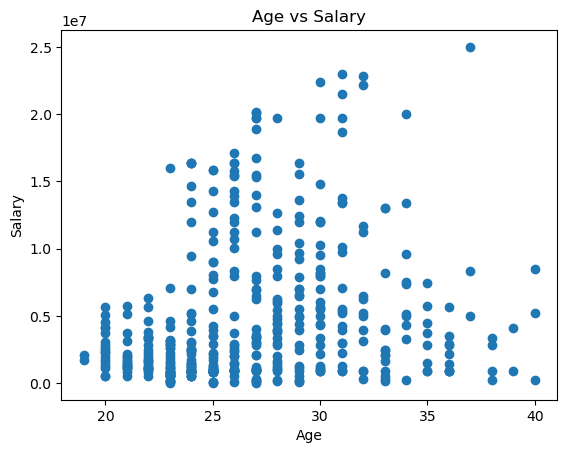

In [23]:
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation}")

# Plotting the correlation
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

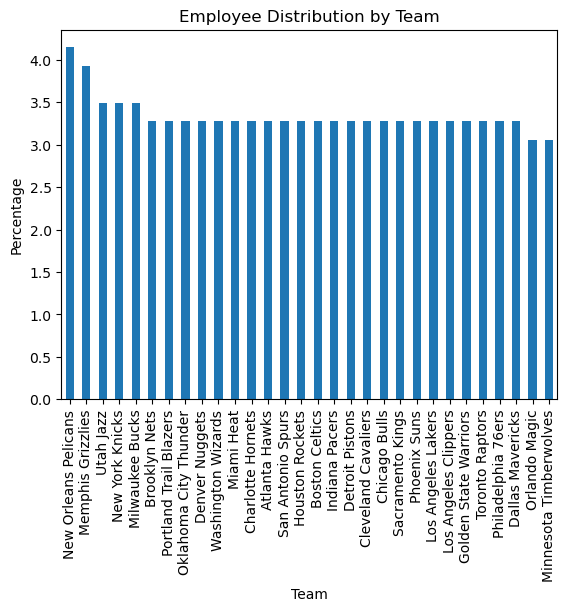

In [25]:
team_distribution.plot(kind='bar', title="Employee Distribution by Team")
plt.ylabel('Percentage')
plt.show()

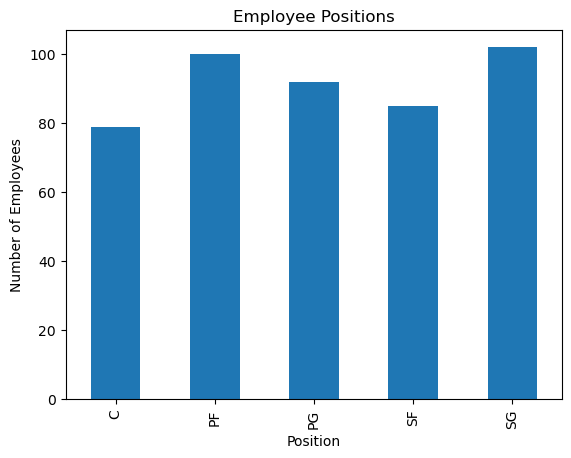

In [27]:
position_groups.plot(kind='bar', title="Employee Positions")
plt.ylabel('Number of Employees')
plt.show()

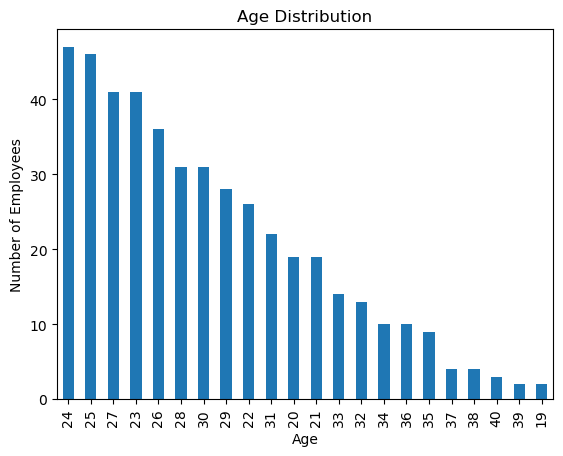

In [29]:
age_group_counts.plot(kind='bar', title="Age Distribution")
plt.ylabel('Number of Employees')
plt.show()

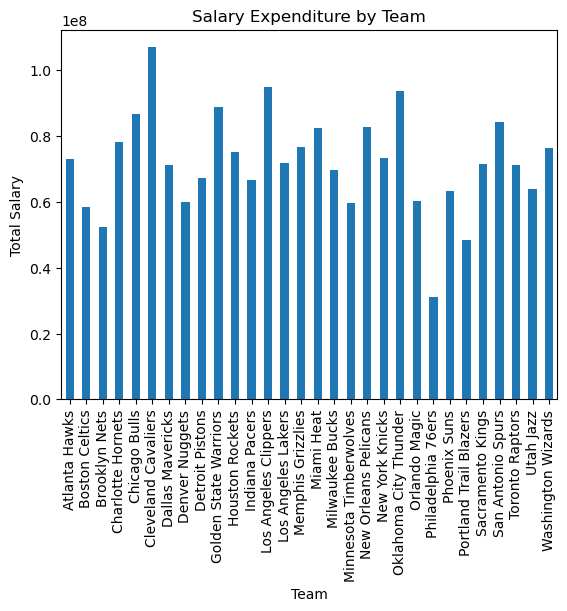

In [31]:
team_salary.plot(kind='bar', title="Salary Expenditure by Team")
plt.ylabel('Total Salary')
plt.show()

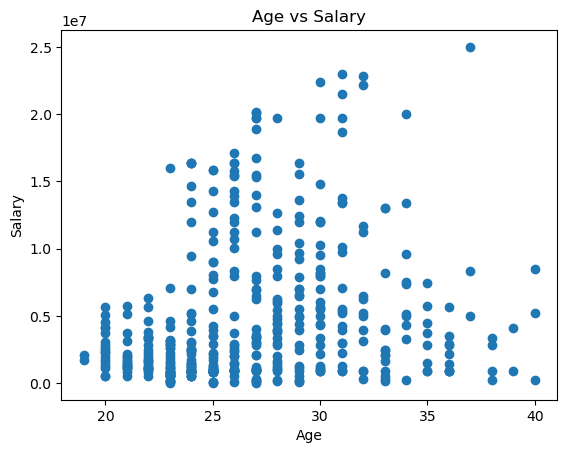

In [35]:
plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()